In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

In [34]:
import numpy as np

def fig_to_array(fig):
    """
    convert matplotlib figure object to numpy array.
    Input:
        fig: matplotlib figure object
    Return:
        numpy array, (height, width, rgba). rgba: red, green blue, alpha(Transparency)。
        (255, 255, 255) is white
    """
    import io
    io_buf = io.BytesIO()
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    fig.savefig(io_buf, format='raw')
    io_buf.seek(0)
    data = np.frombuffer(io_buf.getvalue(), dtype=np.uint8)
    data = data.reshape((int(fig.bbox.bounds[3]), int(fig.bbox.bounds[2]), -1))
    io_buf.close()
    return data[:, :, :3]

In [35]:
UK_shape = gpd.read_file("./ukcp18-uk-land-country-hires.shp")

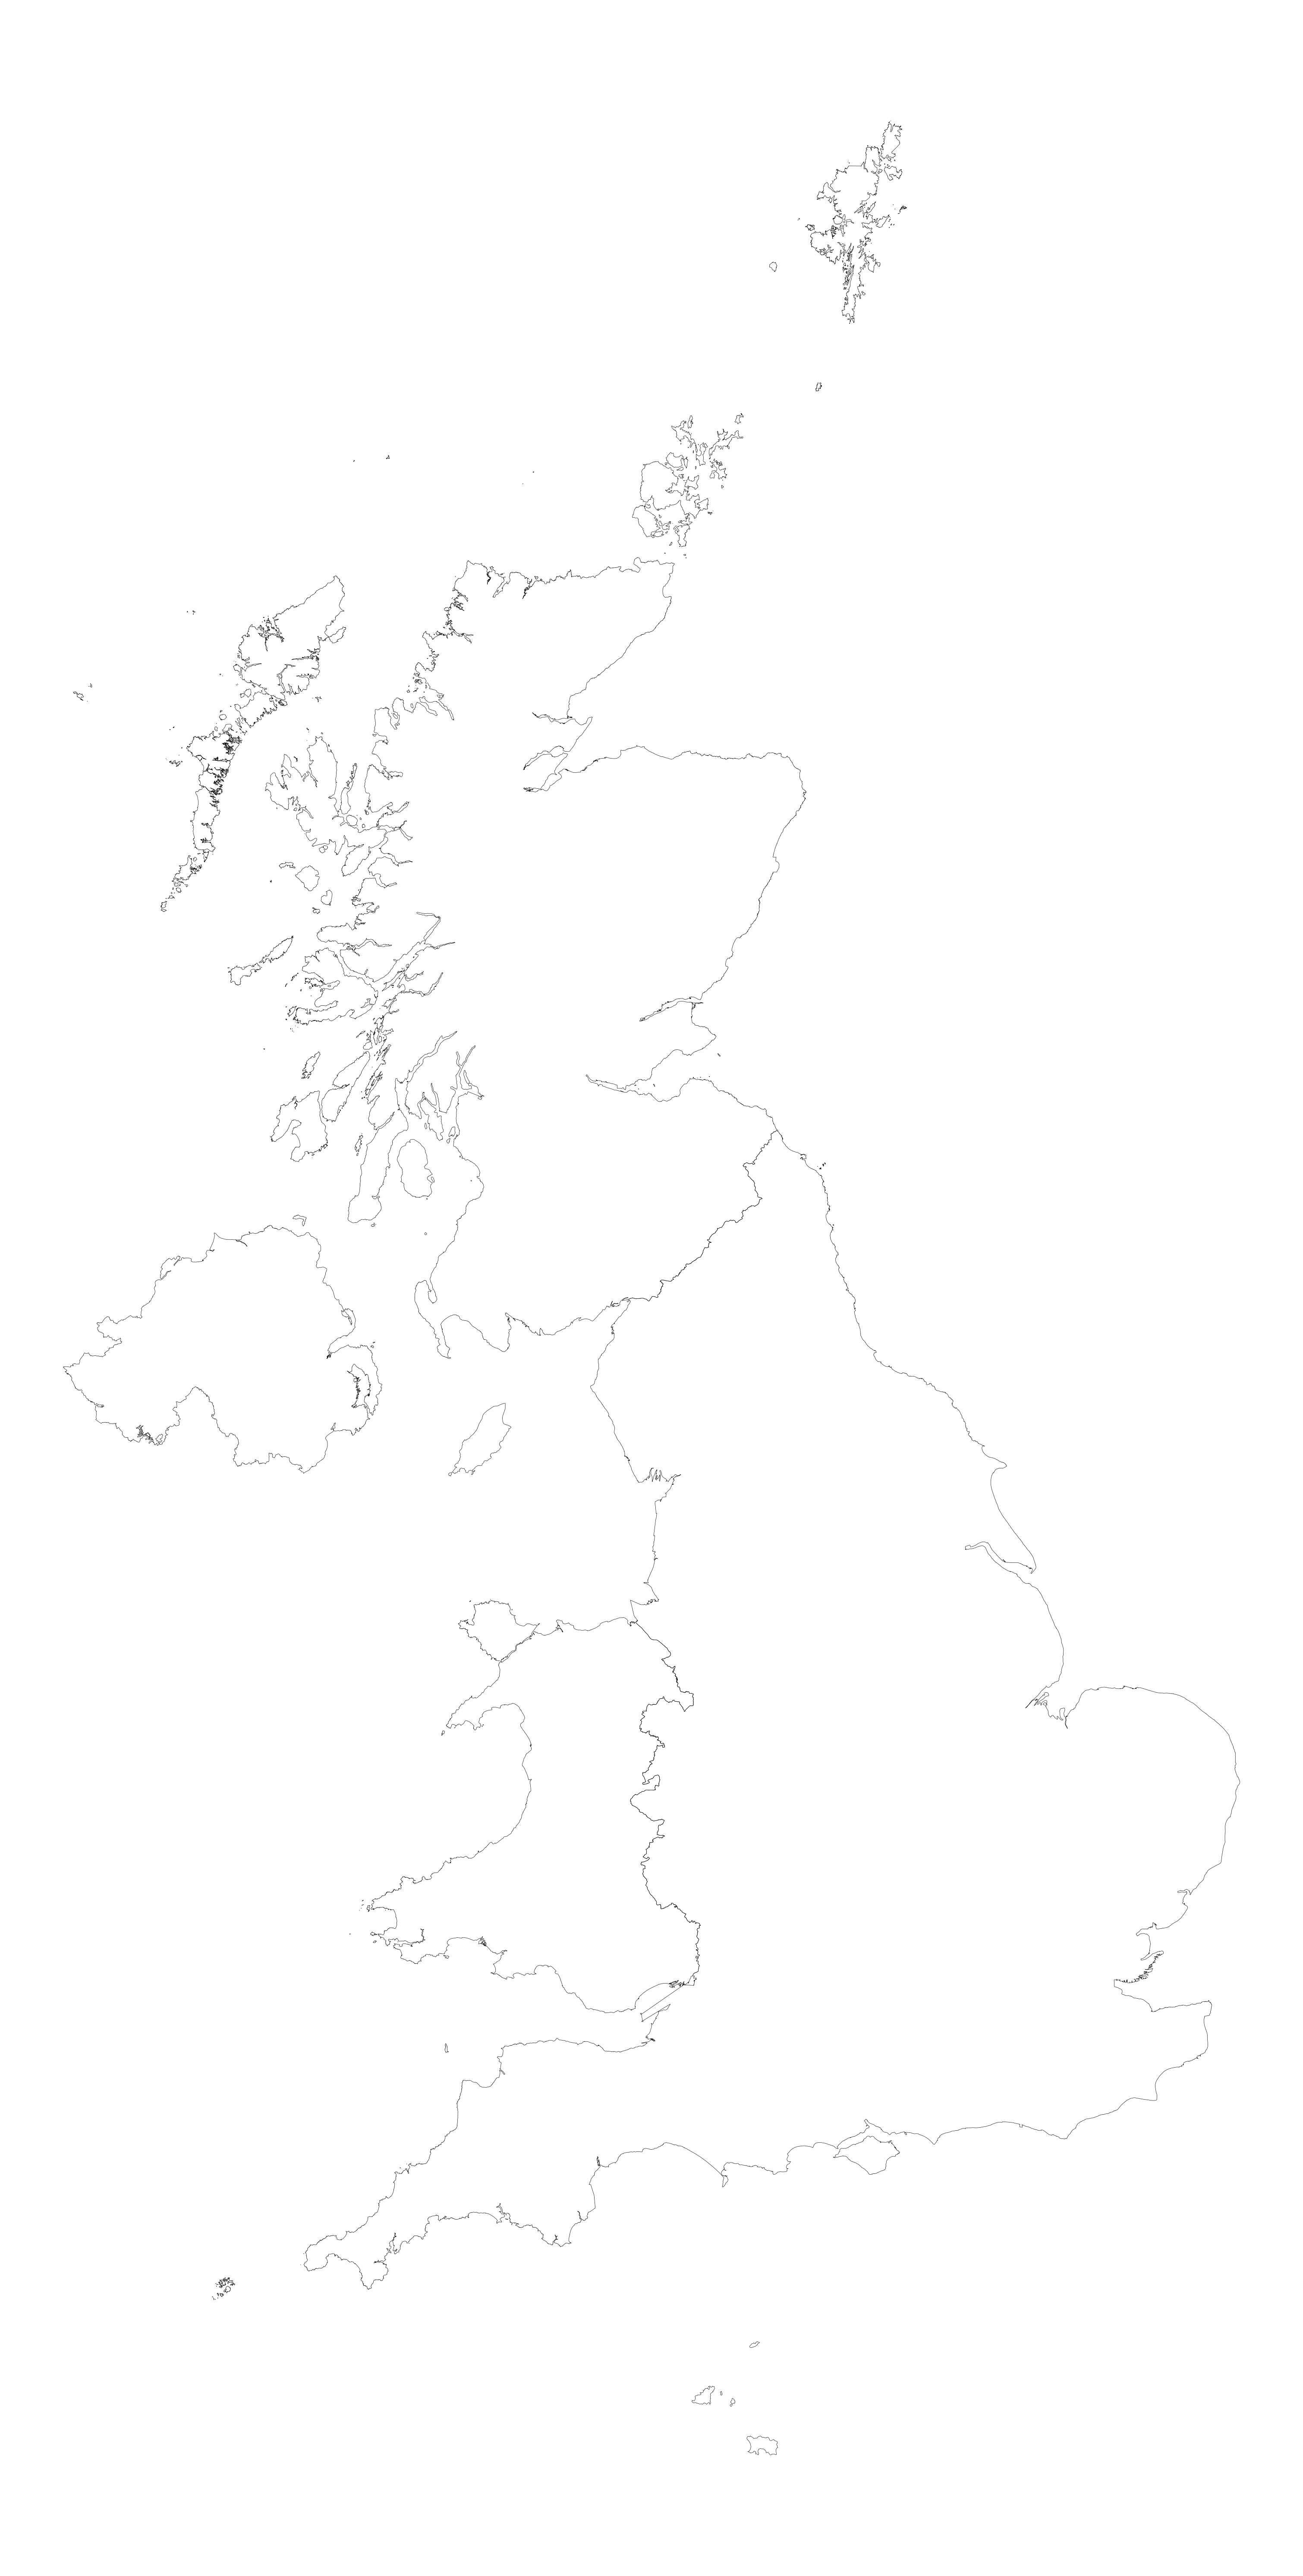

In [36]:
fig = plt.figure(figsize=(30, 60))
# 固定坐标比例
plt.gca().set_aspect('equal', adjustable='box')
UK_shape.boundary.plot(ax=plt.gca(), linewidth=0.5, color='black')
plt.axis('off')
matrix_data = fig_to_array(fig)

In [37]:
matrix_data = (255 - matrix_data).mean(axis=-1)
matrix_data = (matrix_data > 0).astype(np.uint8)
np.save("UK_shape.npy", matrix_data)
